<div align="center">
  <h1><strong>NOTEBOOK TUGAS BESAR DATA MINING</strong></h1>
  <h2><strong>KELOMPOK 5 - SI4605</strong></h2>
  <table style="margin-top: 50px; margin-bottom: 30px; width: 60%; text-align: center;">
    <tr>
      <th>Nama Anggota</th>
      <th>NIM</th>
    </tr>
    <tr>
      <td>Ahmad Fauzi</td>
      <td>1202220263</td>
    </tr>
    <tr>
      <td>Maryam Grischelda Ardety Wijaya</td>
      <td>1202223262</td>
    </tr>
    <tr>
      <td>Matthew Alexander Hasintongan Sitorus</td>
      <td>1202223168</td>
    </tr>
    <tr>
        <td>Muhammad Addin Zulfikar</td>
        <td>1202220132</td>
    </tr>
  </table>
</div>

<br>

---

<br>

<div align="center">
    <h1><strong>💳 Analisis Risiko Credit untuk Prediksi dan Segmentasi Pelanggan Berdasarkan Karakteristik Kredit 💳</strong></h1>
</div>
<div align="center">
    <img src="https://cdn.hswstatic.com/gif/debt-management-credit-card.jpg" alt="" style="max-width: 800px;">
</div>
<br>

Project Tugas Besar Mata Kuliah Data Mining ini bertujuan menganalisis **Credit Risk Dataset** untuk mengeksplorasi faktor-faktor yang memengaruhi risiko kredit dan kemungkinan gagal bayar. Dataset ini mencakup fitur seperti usia, pendapatan, lama bekerja, jumlah pinjaman, dan riwayat kredit, memberikan dasar yang komprehensif untuk menilai kelayakan kredit serta memprediksi risiko gagal bayar.
/
## 📚 **Latar Belakang Masalah**
Penilaian risiko kredit merupakan komponen penting dalam industri keuangan untuk membantu pemberi pinjaman mengevaluasi kemungkinan pelunasan pinjaman. Dengan menganalisis karakteristik demografis dan finansial, proyek ini bertujuan untuk mengidentifikasi faktor-faktor utama yang memengaruhi risiko kredit dan kemungkinan gagal bayar. Dataset ini memberikan wawasan tentang bagaimana faktor seperti pendapatan, tujuan pinjaman, dan riwayat kredit terkait dengan risiko gagal bayar, sehingga memungkinkan pengambilan keputusan yang lebih baik untuk manajemen risiko dan persetujuan pinjaman.

## 📊 **Oveview Dataset**
Dataset yang digunakan dalam proyek ini berisi fitur-fitur terkait data biro kredit dan karakteristik pinjaman. Berikut adalah fitur utama yang terdapat dalam dataset:

- **person_age**: Usia individu.
- **person_income**: Pendapatan tahunan individu.
- **person_home_ownership**: Status kepemilikan rumah (misalnya, sewa, milik sendiri).
- **person_emp_length**: Lama bekerja dalam tahun.
- **loan_intent**: Tujuan pinjaman (misalnya, pendidikan, medis).
- **loan_grade**: Tingkatan kredit yang diberikan pada pinjaman.
- **loan_amnt**: Jumlah pinjaman yang diminta.
- **loan_int_rate**: Suku bunga yang dikenakan pada pinjaman.
- **loan_status**: Status pinjaman (0 menunjukkan tidak gagal bayar, 1 menunjukkan gagal bayar).
- **loan_percent_income**: Persentase pendapatan yang dialokasikan untuk pinjaman.
- **cb_person_default_on_file**: Status gagal bayar historis (misalnya, Y/N).
- **cb_preson_cred_hist_length**: Lama riwayat kredit dalam tahun.

&nbsp;
&nbsp;

---

&nbsp;
&nbsp;

# **XGBoost Classifier Model (Classification)**

&nbsp;
&nbsp;

---

&nbsp;
&nbsp;

## **Data Understanding Phase**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [3]:
ccol=df.select_dtypes(include=["object"]).columns
ncol=df.select_dtypes(include=["int","float"]).columns

print("The number of Categorical columns are:",len(ccol))
print("The number of Numerical columns are:",len(ncol))

The number of Categorical columns are: 4
The number of Numerical columns are: 8


In [4]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [5]:
df.describe(include='object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


### Duplicated Value Handling

In [6]:
df.duplicated().sum()

165

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

### Null Values Handling

In [9]:
total_cells = df.shape[0]

missing_values = df.isnull().sum()
missing_percentage = (missing_values / total_cells) * 100
missing_percentage = missing_percentage.round(4)

missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage
})

missing_info = missing_info.sort_values(by='Missing Values', ascending=False)

missing_info

,Missing Values,Missing Percentage (%)
loan_int_rate,3095,9.5478
person_emp_length,887,2.7363
person_age,0,0.0000
person_income,0,0.0000
person_home_ownership,0,0.0000
loan_intent,0,0.0000
loan_grade,0,0.0000
loan_amnt,0,0.0000
loan_status,0,0.0000
loan_percent_income,0,0.0000


In [10]:
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].mean())
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())

In [11]:
total_cells = df.shape[0]

missing_values = df.isnull().sum()
missing_percentage = (missing_values / total_cells) * 100
missing_percentage = missing_percentage.round(4)

missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage
})

missing_info = missing_info.sort_values(by='Missing Values', ascending=False)

missing_info

,Missing Values,Missing Percentage (%)
person_age,0,0.0
person_income,0,0.0
person_home_ownership,0,0.0
person_emp_length,0,0.0
loan_intent,0,0.0
loan_grade,0,0.0
loan_amnt,0,0.0
loan_int_rate,0,0.0
loan_status,0,0.0
loan_percent_income,0,0.0


### Unique Values Handling

In [12]:
# Calculate unique values and their percentages by df type
unique_values = df.nunique()
unique_percentage = (unique_values / total_cells) * 100
unique_percentage = unique_percentage.round(4)

# Separate numerical and categorical columns
df_types = df.dtypes
numerical_features = df_types[df_types != 'object'].index
categorical_features = df_types[df_types == 'object'].index

# Create dfframe for unique information
unique_info_numerical = pd.DataFrame({
    'Unique Values': unique_values[numerical_features],
    'Unique Percentage (%)': unique_percentage[numerical_features]
})
unique_info_numerical = unique_info_numerical.sort_values(by='Unique Values', ascending=False)

# Display unique information for numerical and categorical columns
print("Unique Information for Numerical Columns:")
unique_info_numerical

Unique Information for Numerical Columns:


,Unique Values,Unique Percentage (%)
person_income,4295,13.2496
loan_amnt,753,2.3229
loan_int_rate,349,1.0766
loan_percent_income,77,0.2375
person_age,58,0.1789
person_emp_length,36,0.1111
cb_person_cred_hist_length,29,0.0895
loan_status,2,0.0062


In [13]:
unique_info_categorical = pd.DataFrame({
    'Unique Values': unique_values[categorical_features],
    'Unique Percentage (%)': unique_percentage[categorical_features]
})
unique_info_categorical = unique_info_categorical.sort_values(by='Unique Values', ascending=False)
print("\nUnique Information for Categorical Columns:")
unique_info_categorical


Unique Information for Categorical Columns:


,Unique Values,Unique Percentage (%)
loan_grade,7,0.0216
loan_intent,6,0.0185
person_home_ownership,4,0.0123
cb_person_default_on_file,2,0.0062


---

## **Exploratory Data Analysis (EDA)**

In [14]:
# Filter numerical and categorical features that are still present in the DataFrame after df cleaning!
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

### Correlation Matrix Analysis

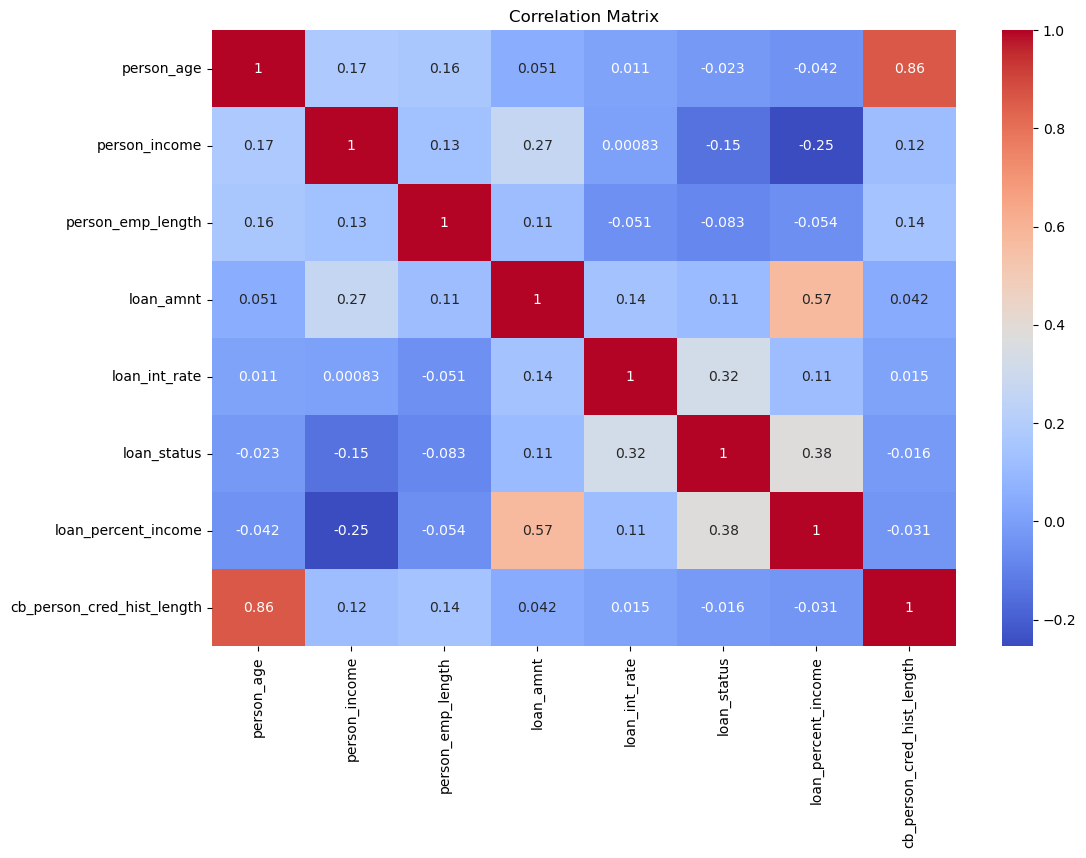

In [15]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Relationships Between Variables Based on Loan Status

<Figure size 1500x1000 with 0 Axes>

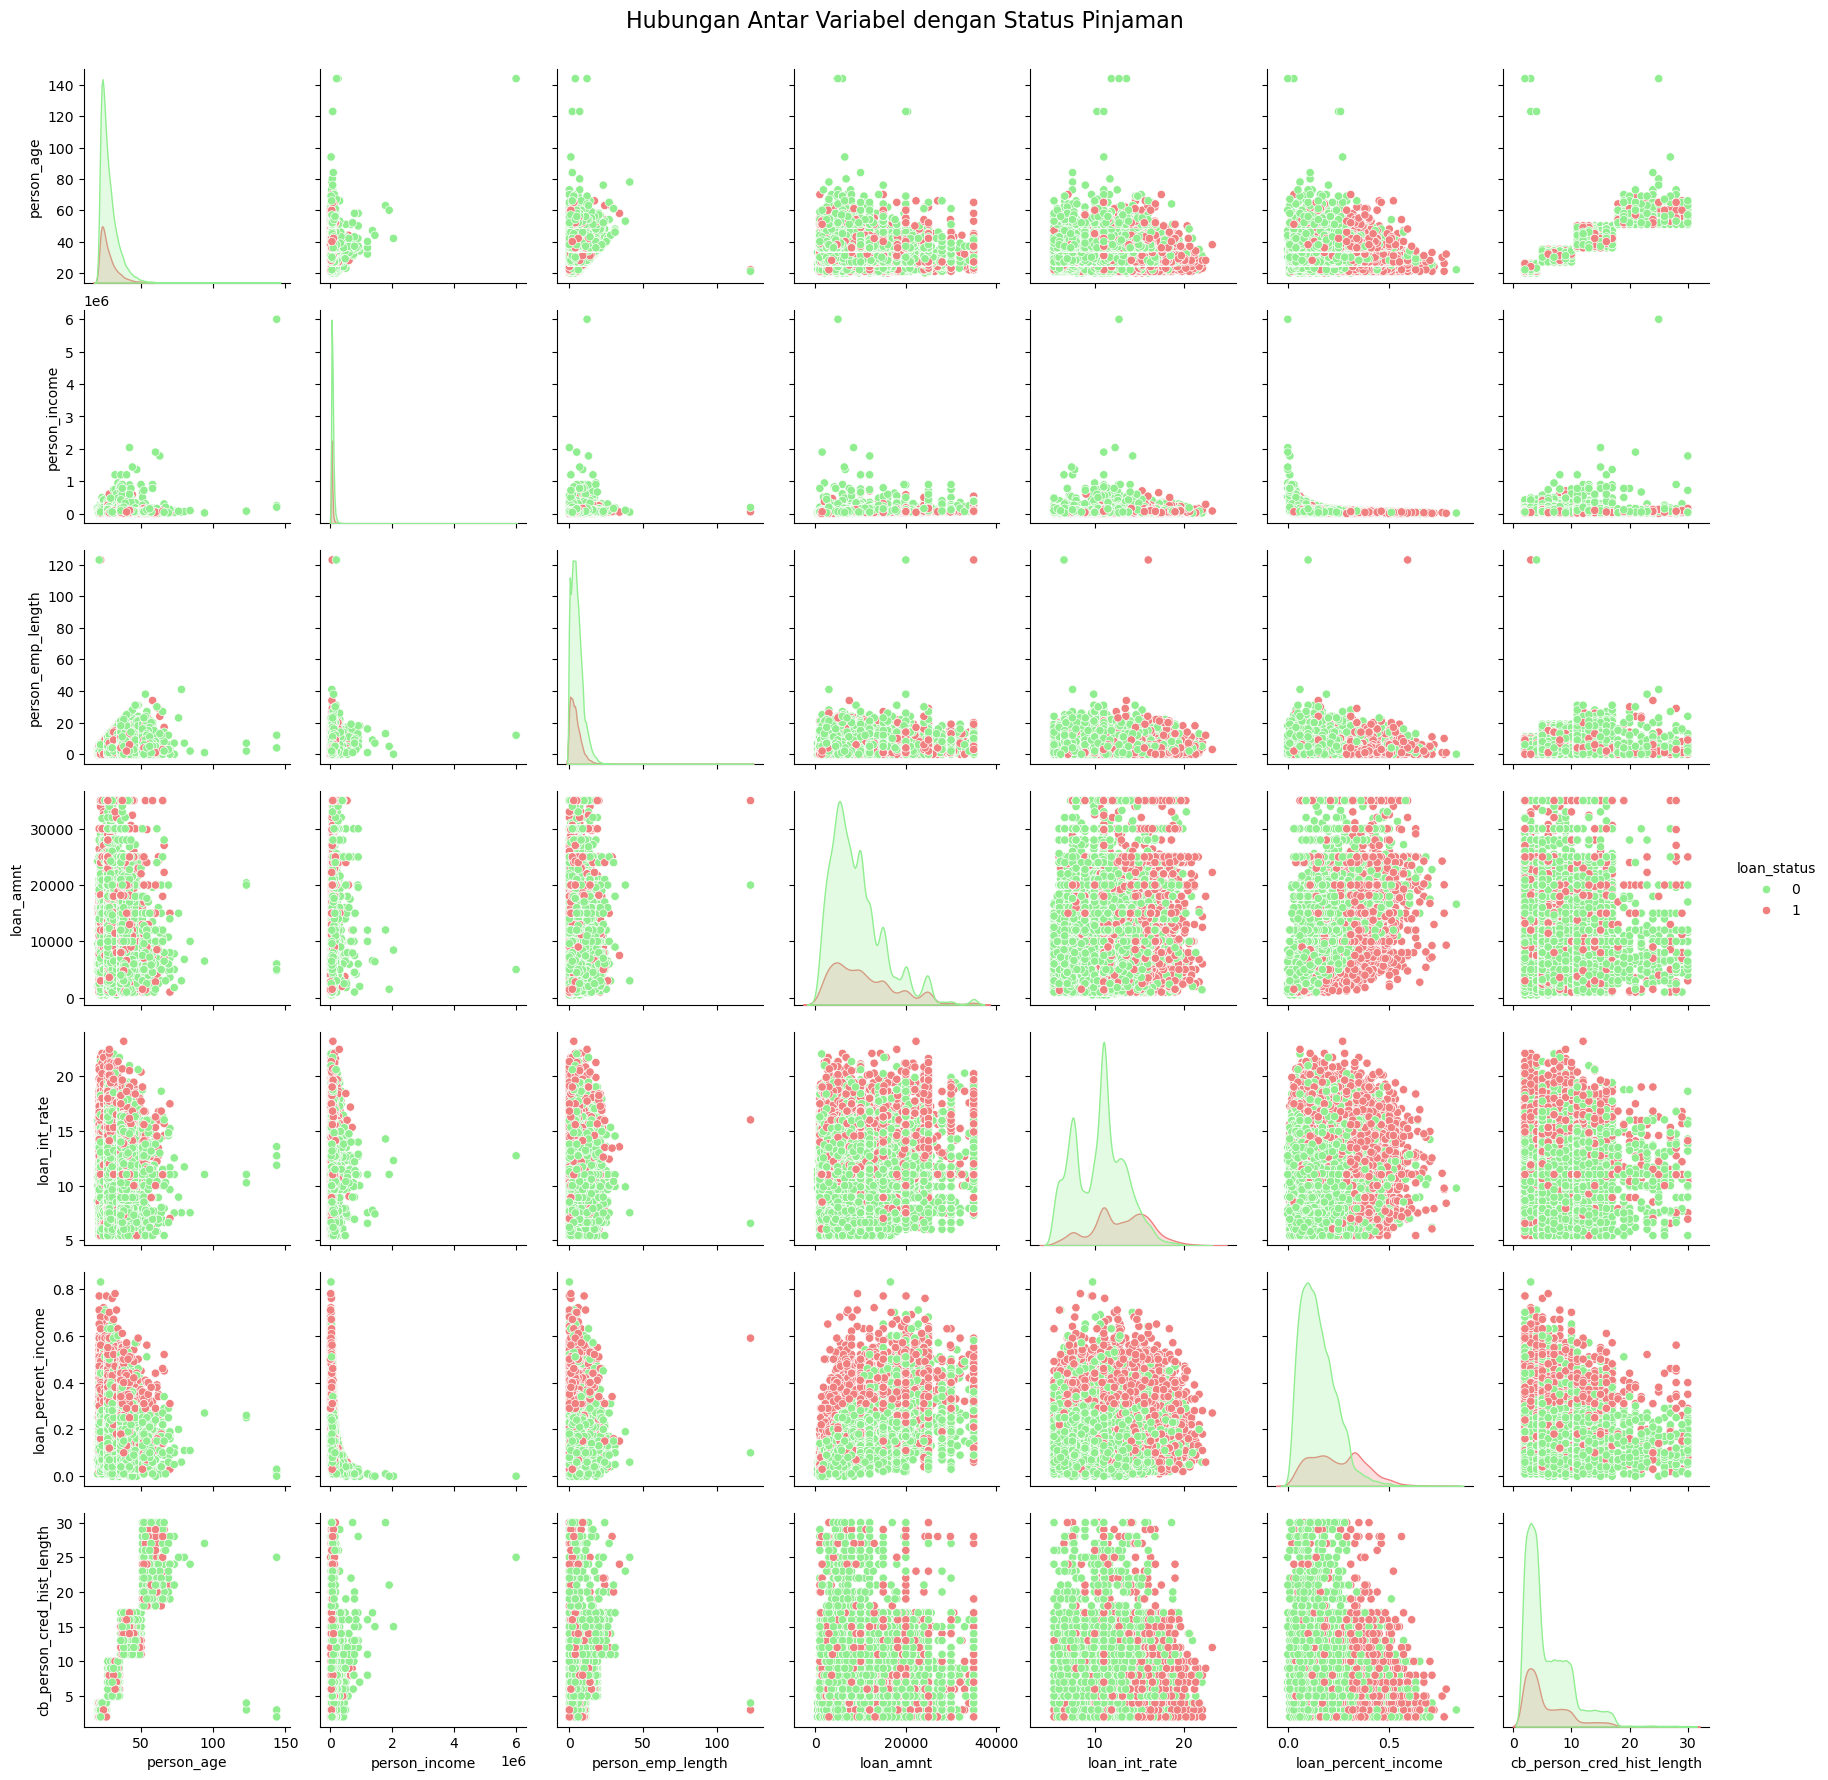

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat pairplot untuk melihat hubungan antar variabel numerik
plt.figure(figsize=(15, 10))  # Ukuran grafik yang memudahkan analisis
sns.pairplot(df, hue='loan_status', palette={0: 'lightgreen', 1: 'lightcoral'})

# Memberikan judul (walaupun pairplot tidak memiliki parameter langsung untuk ini)
plt.suptitle('Hubungan Antar Variabel dengan Status Pinjaman', fontsize=16, y=1.02)

# Menampilkan plot
plt.show()


### Distributions of Numerical Features Using Boxplots

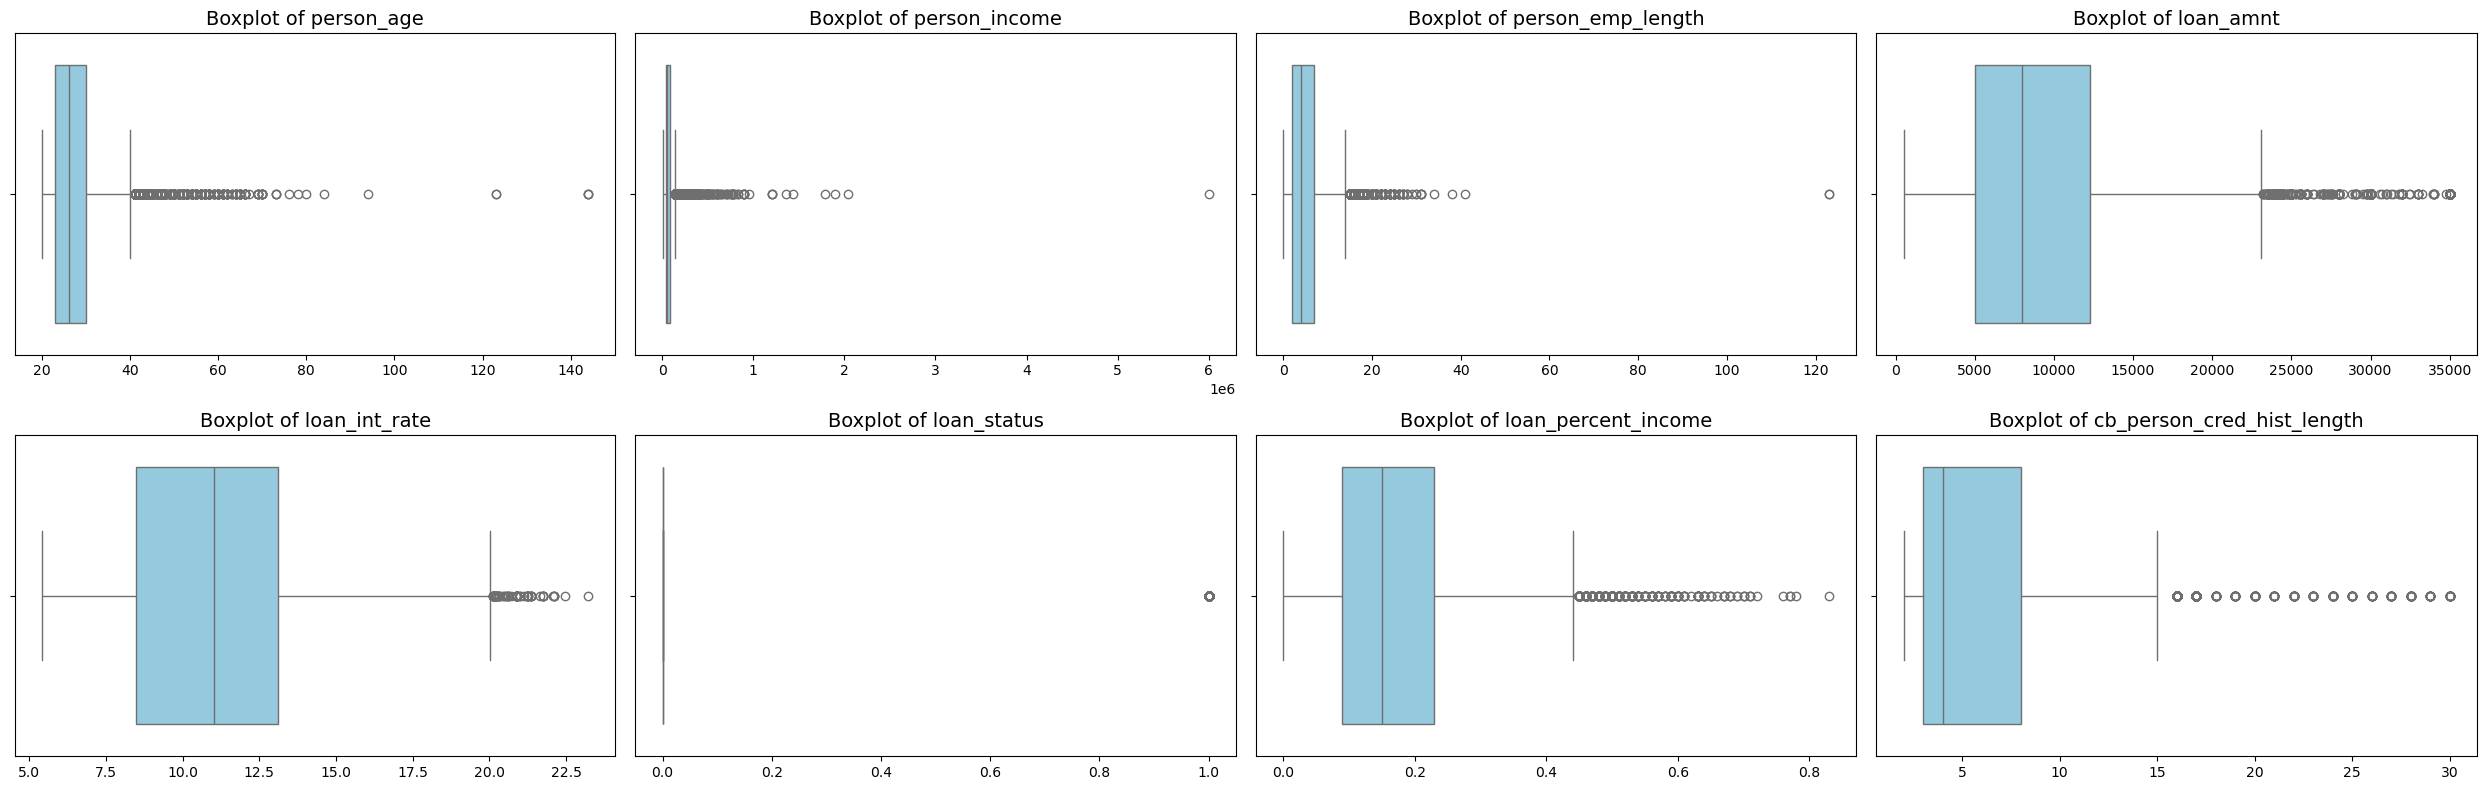

In [17]:
# Calculate number of subplots needed
num_plots = len(numerical_features)

# Determine number of rows and columns for subplots
cols = 4
rows = num_plots // cols
if num_plots % cols != 0:
    rows += 1

# Define figure and axes
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(25, 4 * rows))
axes = axes.flatten()

# Loop through numerical features and create boxplots
for i, col in enumerate(numerical_features):
    if i < num_plots:
        sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
        axes[i].set_title(f'Boxplot of {col}', fontsize=14)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

# Remove any unused axes
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

### Loan Status Distribution: Good vs Bad Loans

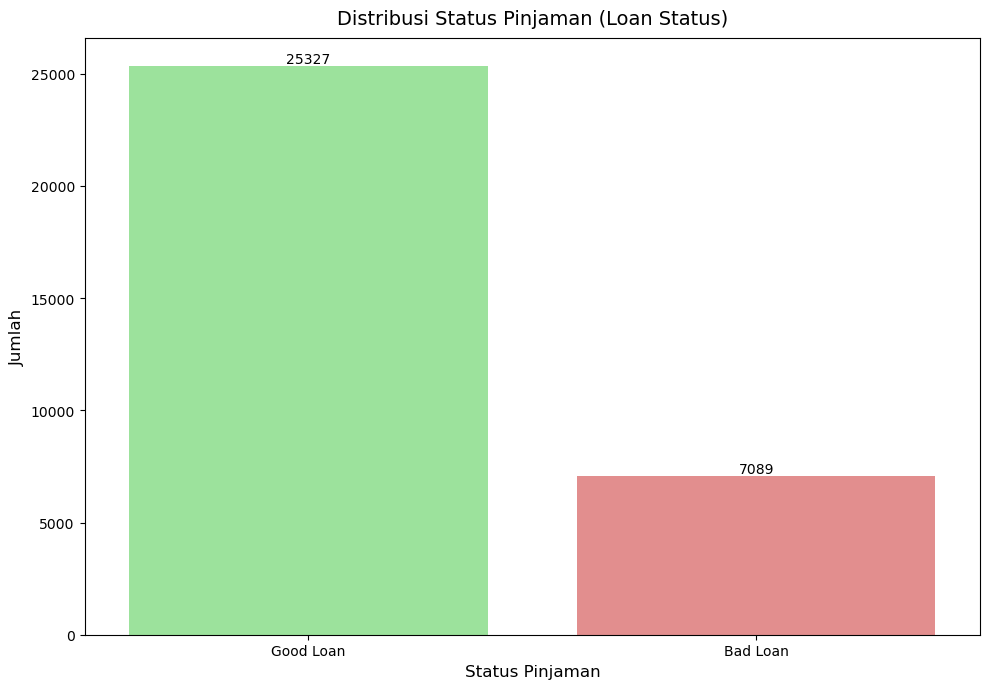

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))

# Membuat countplot dengan warna yang ditentukan dan legenda disembunyikan
ax = sns.countplot(x='loan_status', data=df, hue='loan_status', 
                    palette={1: 'lightcoral', 0: 'lightgreen'}, legend=False)

# Menambahkan anotasi pada setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5),  # Menggeser anotasi agar tidak terlalu dekat dengan ujung
                textcoords='offset points',
                fontsize=10)

# Mengatur label sumbu x dengan nama yang lebih deskriptif
ax.set_xticks([0, 1])
ax.set_xticklabels(['Good Loan', 'Bad Loan'])

# Menambahkan elemen tambahan ke dalam plot
plt.title('Distribusi Status Pinjaman (Loan Status)', fontsize=14, pad=10)
plt.xlabel('Status Pinjaman', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()


### Loan Status Distribution by Age

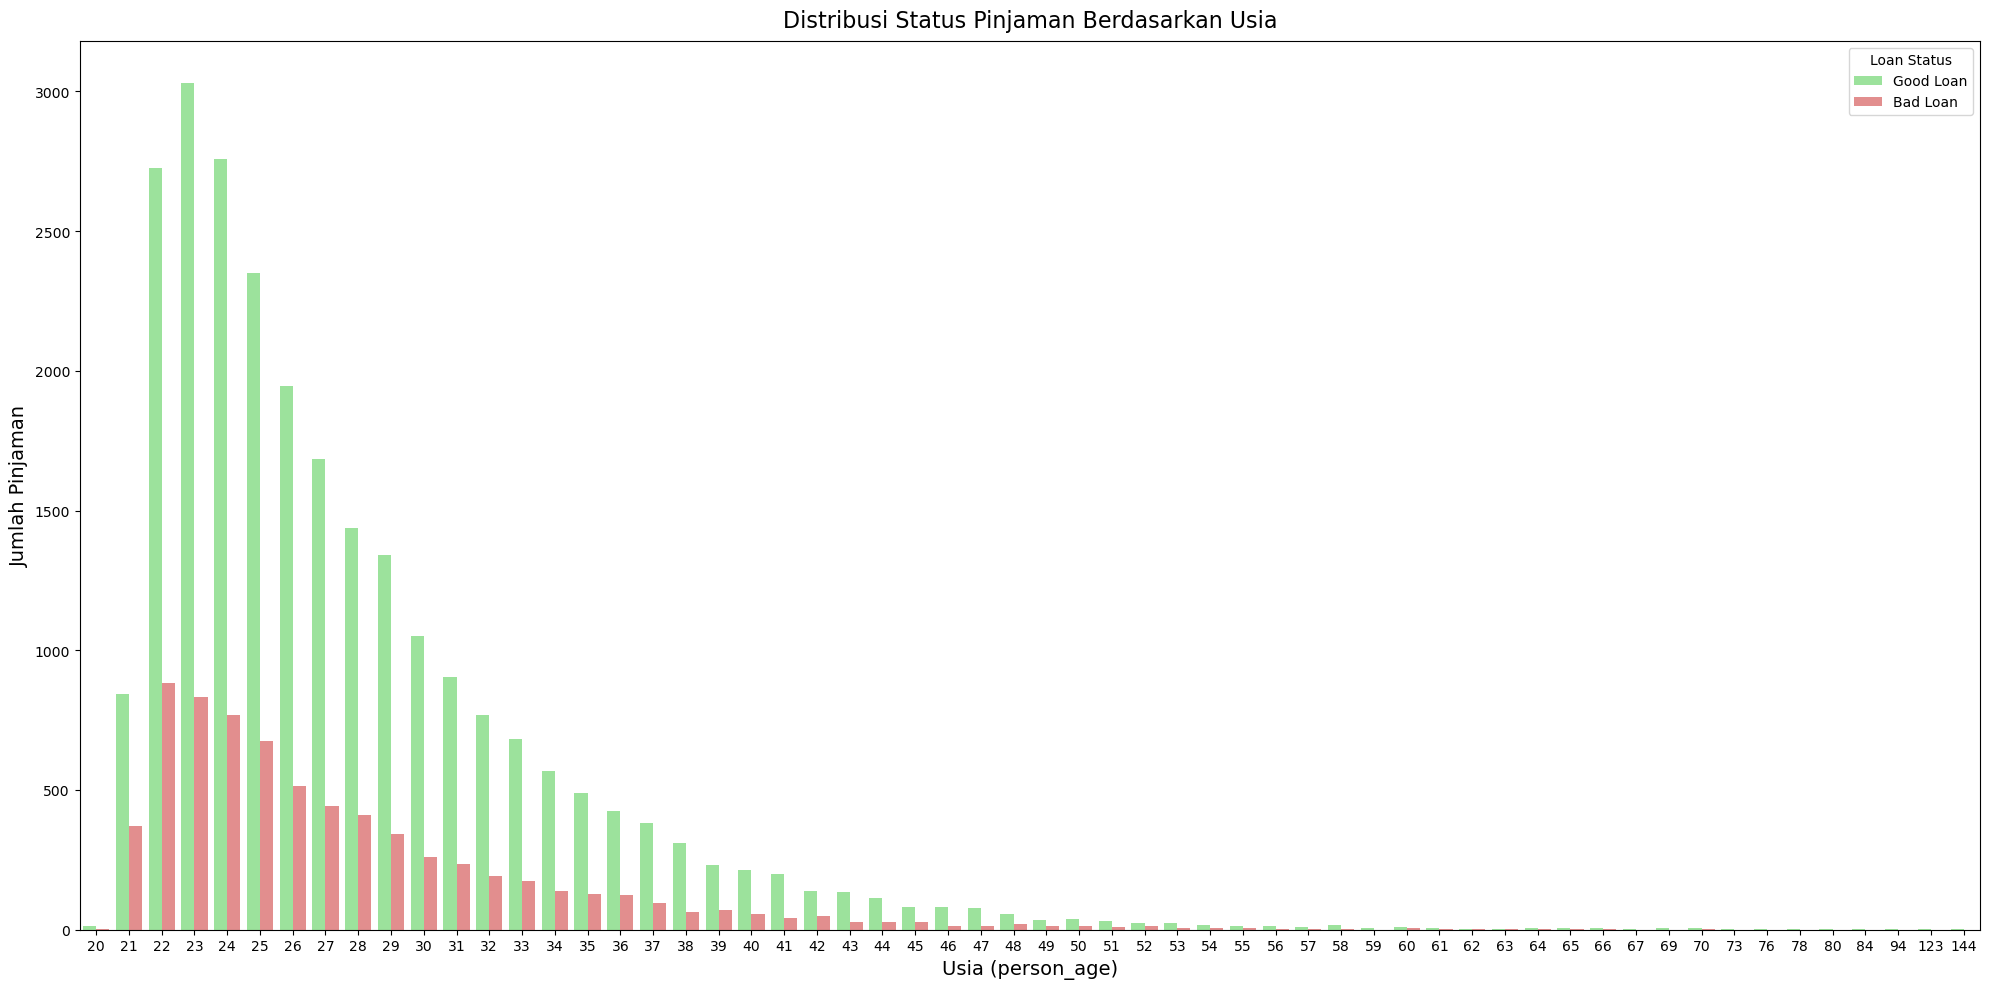

In [19]:
# Ukuran grafik yang lebih besar untuk memudahkan analisis
plt.figure(figsize=[20,10])

# Membuat countplot dengan warna yang spesifik
sns.countplot(x='person_age', 
              hue='loan_status', 
              data=df, 
              palette={0: 'lightgreen', 1: 'lightcoral'})

# Mengatur label untuk mengganti 0 dan 1 menjadi "Good Loan" dan "Bad Loan"
plt.legend(title='Loan Status', labels=['Good Loan', 'Bad Loan'])

# Memberikan judul, label sumbu x dan y untuk penyesuaian visualisasi
plt.title('Distribusi Status Pinjaman Berdasarkan Usia', fontsize=16, pad=10)
plt.xlabel('Usia (person_age)', fontsize=14)
plt.ylabel('Jumlah Pinjaman', fontsize=14)

# Memastikan layout tidak berantakan dan elemen tampil dengan rapi
plt.tight_layout()

# Menampilkan plot
plt.show()

### Loan Status Distribution by Home Ownership Category

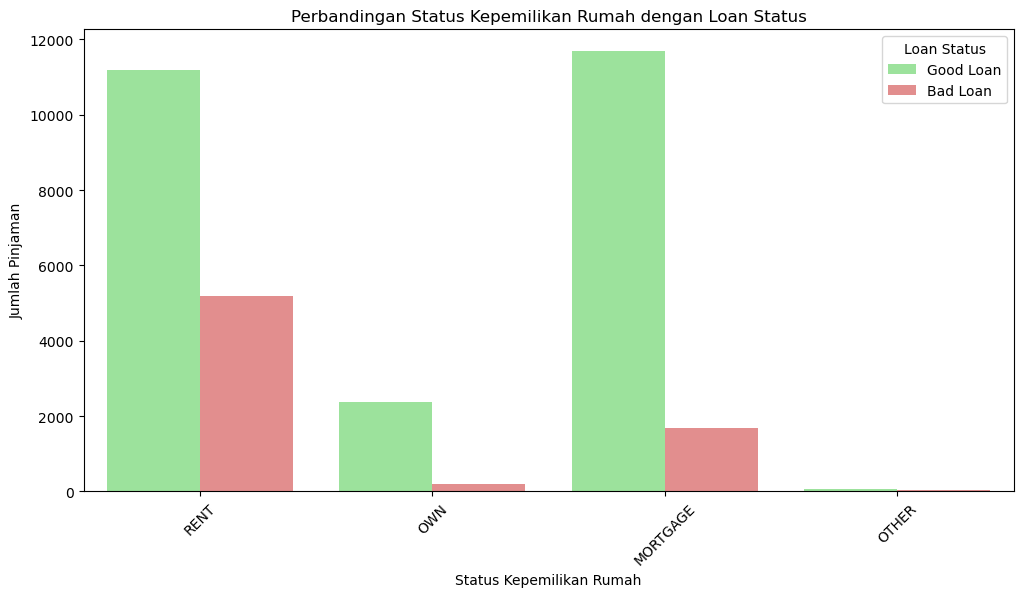

In [20]:
# Membuat bar chart untuk membandingkan person_home_ownership dengan loan_status
plt.figure(figsize=(12, 6))
sns.countplot(
    x='person_home_ownership',
    hue='loan_status',
    data=df,
    palette={0: 'lightgreen', 1: 'lightcoral'}
)

# Memberikan detail pada plot
plt.title('Perbandingan Status Kepemilikan Rumah dengan Loan Status')
plt.xlabel('Status Kepemilikan Rumah')
plt.ylabel('Jumlah Pinjaman')
plt.legend(title='Loan Status', labels=['Good Loan', 'Bad Loan'])

# Menampilkan grafik
plt.xticks(rotation=45)  # Memutar label x agar lebih rapi jika panjang
plt.show()


### Loan Status Distribution by Loan Grade

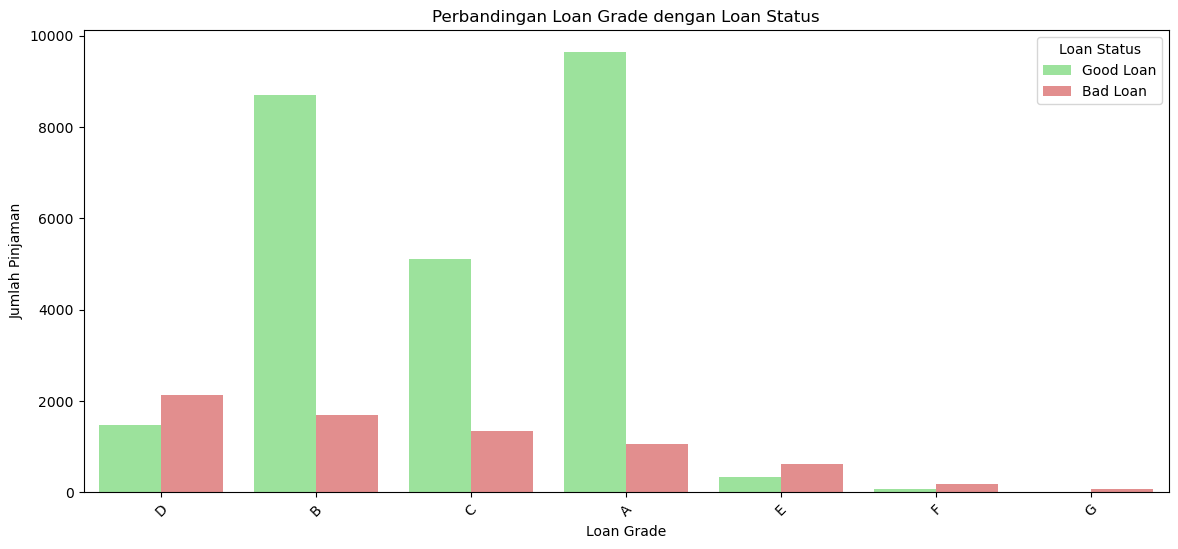

In [21]:
# Membuat bar chart untuk membandingkan loan_grade dengan loan_status
plt.figure(figsize=(14, 6))
sns.countplot(
    x='loan_grade',
    hue='loan_status',
    data=df,
    palette={0: 'lightgreen', 1: 'lightcoral'}
)

# Memberikan detail pada plot
plt.title('Perbandingan Loan Grade dengan Loan Status')
plt.xlabel('Loan Grade')
plt.ylabel('Jumlah Pinjaman')
plt.legend(title='Loan Status', labels=['Good Loan', 'Bad Loan'])

# Memutar sumbu x agar label lebih rapi jika panjang
plt.xticks(rotation=45)

# Menampilkan grafik
plt.show()

### Loan Status Distribution by Loan Intent

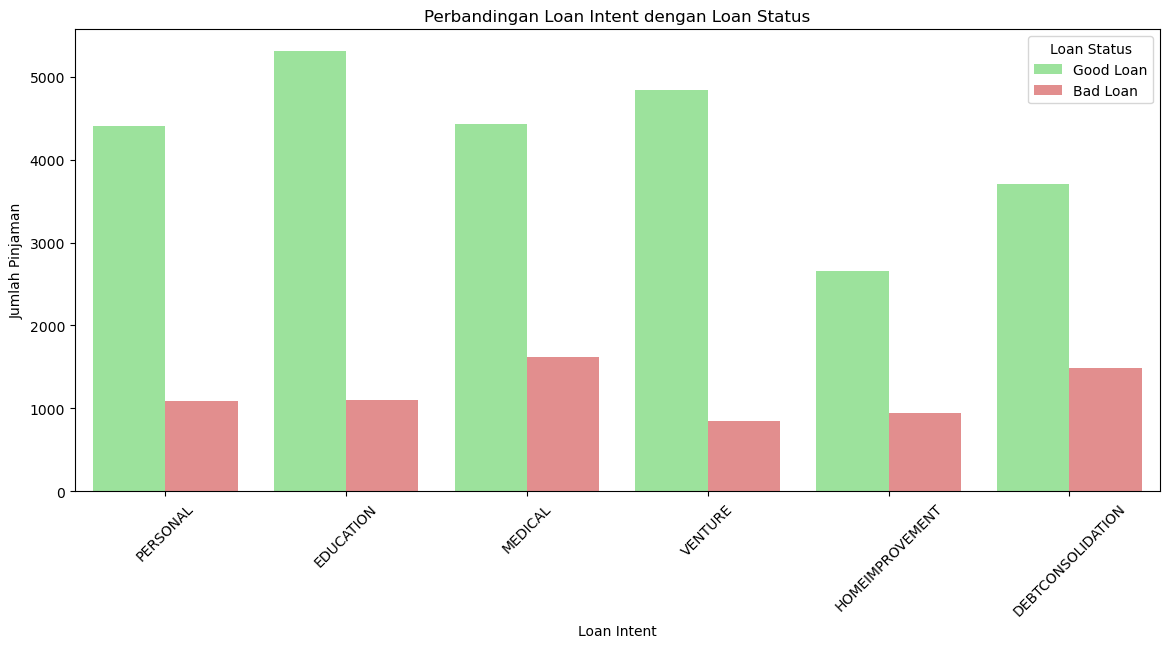

In [22]:
# Membuat bar chart untuk membandingkan loan_intent dengan loan_status
plt.figure(figsize=(14, 6))
sns.countplot(
    x='loan_intent',
    hue='loan_status',
    data=df,
    palette={0: 'lightgreen', 1: 'lightcoral'}
)

# Memberikan detail pada plot
plt.title('Perbandingan Loan Intent dengan Loan Status')
plt.xlabel('Loan Intent')
plt.ylabel('Jumlah Pinjaman')
plt.legend(title='Loan Status', labels=['Good Loan', 'Bad Loan'])

# Memutar sumbu x agar label lebih rapi jika panjang
plt.xticks(rotation=45)

# Menampilkan grafik
plt.show()

### Loan Status Distribution by Historical Default Status

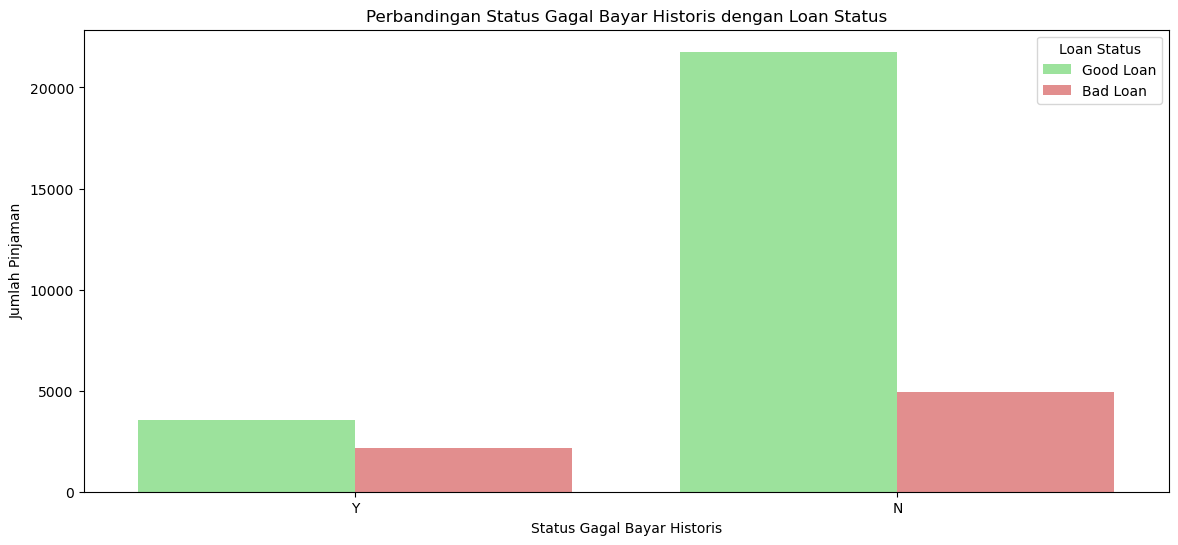

In [23]:
# Membuat bar chart untuk membandingkan cb_person_default_on_file dengan loan_status
plt.figure(figsize=(14, 6))
sns.countplot(
    x='cb_person_default_on_file',
    hue='loan_status',
    data=df,
    palette={0: 'lightgreen', 1: 'lightcoral'}
)

# Memberikan detail pada plot
plt.title('Perbandingan Status Gagal Bayar Historis dengan Loan Status')
plt.xlabel('Status Gagal Bayar Historis')
plt.ylabel('Jumlah Pinjaman')
plt.legend(title='Loan Status', labels=['Good Loan', 'Bad Loan'])

# Memutar sumbu x agar label lebih rapi jika panjang
plt.xticks(rotation=0)

# Menampilkan grafik
plt.show()

---

## **Data Preparation**

### Outlier Handling

In [24]:
numerical_features

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

In [25]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in numerical_features:
    data_outlier = remove_outliers(df, col)

In [26]:
print("Total row before remove outlier:")
print(df.shape)
print("\nTotal row after remove outlier:")
print(data_outlier.shape)

Total row before remove outlier:
(32416, 12)

Total row after remove outlier:
(31277, 12)


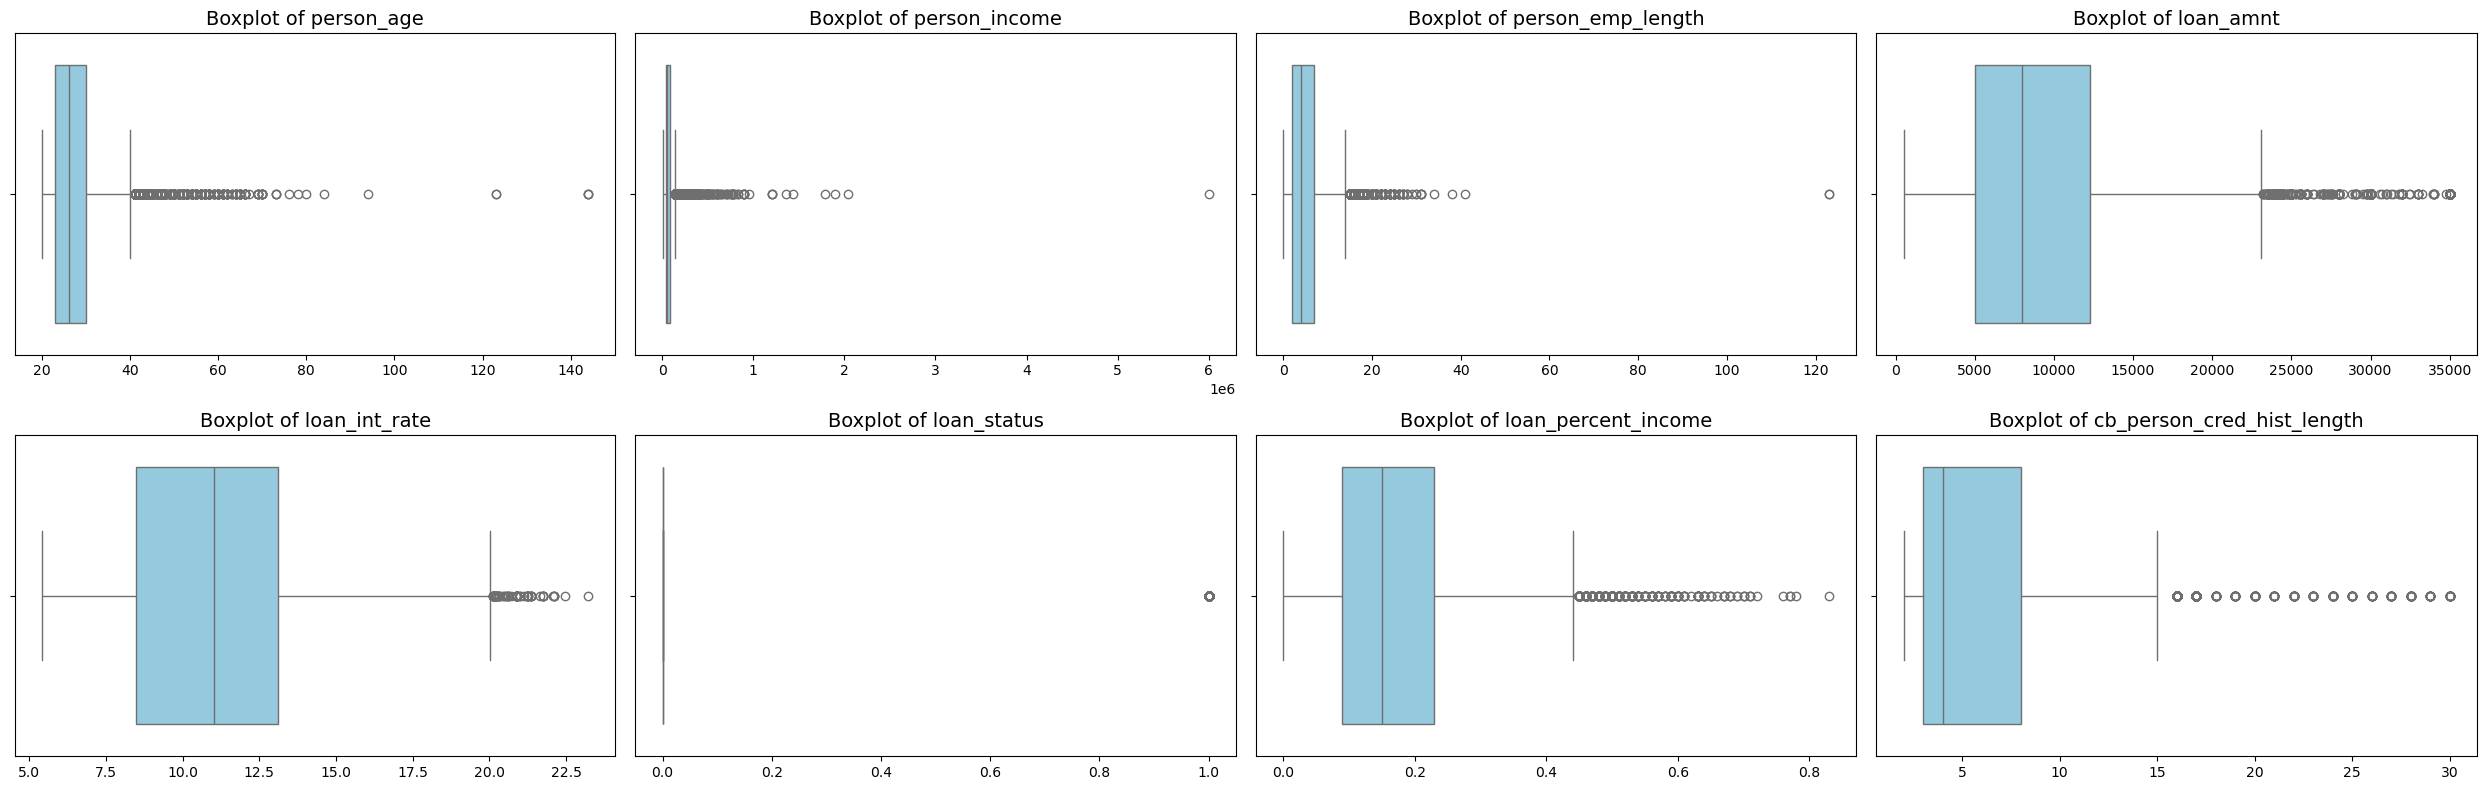

In [27]:
# Determine number of rows and columns for subplots
numerical_features = data_outlier.select_dtypes(include=['int64', 'float64']).columns

cols = 4
rows = num_plots // cols
if num_plots % cols != 0:
    rows += 1

# Define figure and axes
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(25, 4 * rows))
axes = axes.flatten()

# Loop through numerical features and create boxplots
for i, col in enumerate(numerical_features):
    if i < num_plots:
        sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
        axes[i].set_title(f'Boxplot of {col}', fontsize=14)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

# Remove any unused axes
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

Person Age Outlier Handling (> 100)

In [28]:
data_outlier['person_age'].max()

144

In [29]:
data_outlier = data_outlier[data_outlier['person_age'] < 100]

In [30]:
data_outlier['person_age'].max()

50

### Feature Engineering

In [31]:
data = data_outlier.copy()

In [32]:
# Create loan-to-income ratio
data['loan_to_income_ratio'] = data['loan_amnt'] / data['person_income']

# Create loan-to-employment length ratio
data['loan_to_emp_length_ratio'] =  data['person_emp_length']/ data['loan_amnt'] 

# Create interest rate-to-loan amount ratio
data['int_rate_to_loan_amt_ratio'] = data['loan_int_rate'] / data['loan_amnt']

In [33]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,0.593220,0.003514,0.000458
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0.104167,0.005000,0.011140
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,0.572917,0.000182,0.002340
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0.534351,0.000114,0.000435
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,0.643382,0.000229,0.000408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32290,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,A,4000,6.62,0,0.04,N,15,0.044444,0.002750,0.001655
32292,38,200000,MORTGAGE,0.0,DEBTCONSOLIDATION,A,3000,7.68,0,0.01,N,12,0.015000,0.000000,0.002560
32293,38,110000,MORTGAGE,5.0,MEDICAL,B,16000,11.99,0,0.15,N,13,0.145455,0.000313,0.000749
32294,36,92000,MORTGAGE,18.0,DEBTCONSOLIDATION,A,4000,7.29,0,0.04,N,13,0.043478,0.004500,0.001822


### Data Transformation

##### Discretization (Data Binning)

Income Group

In [34]:
data['income_group'] = pd.cut(data['person_income'],
                              bins=[0, 25000, 50000, 75000, 100000, float('inf')],
                              labels=['low', 'low-middle', 'middle', 'high-middle', 'high'])

In [35]:
data.drop('person_income', axis=1, inplace=True)

In [36]:
data['income_group'].value_counts()

income_group
low-middle     11181
middle          9268
high-middle     4457
high            3994
low             2373
Name: count, dtype: int64

Loan Amount

In [37]:
data['loan_amount_group'] = pd.cut(data['loan_amnt'],
                                   bins=[0, 5000, 10000, 15000, float('inf')],
                                   labels=['small', 'medium', 'large', 'very large'])

In [38]:
data.drop('loan_amnt', axis=1, inplace=True)

In [39]:
data['loan_amount_group'].value_counts()

loan_amount_group
medium        11558
small          9115
large          5888
very large     4712
Name: count, dtype: int64

##### Data Encoding

One Hot Encoder

In [40]:
data

,person_age,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio,income_group,loan_amount_group
0,22,RENT,123.0,PERSONAL,D,16.02,1,0.59,Y,3,0.593220,0.003514,0.000458,middle,very large
1,21,OWN,5.0,EDUCATION,B,11.14,0,0.10,N,2,0.104167,0.005000,0.011140,low,small
2,25,MORTGAGE,1.0,MEDICAL,C,12.87,1,0.57,N,3,0.572917,0.000182,0.002340,low,medium
3,23,RENT,4.0,MEDICAL,C,15.23,1,0.53,N,2,0.534351,0.000114,0.000435,middle,very large
4,24,RENT,8.0,MEDICAL,C,14.27,1,0.55,Y,4,0.643382,0.000229,0.000408,middle,very large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32290,37,MORTGAGE,11.0,DEBTCONSOLIDATION,A,6.62,0,0.04,N,15,0.044444,0.002750,0.001655,high-middle,small
32292,38,MORTGAGE,0.0,DEBTCONSOLIDATION,A,7.68,0,0.01,N,12,0.015000,0.000000,0.002560,high,small
32293,38,MORTGAGE,5.0,MEDICAL,B,11.99,0,0.15,N,13,0.145455,0.000313,0.000749,high,very large
32294,36,MORTGAGE,18.0,DEBTCONSOLIDATION,A,7.29,0,0.04,N,13,0.043478,0.004500,0.001822,high-middle,small


In [41]:
from sklearn.preprocessing import OneHotEncoder


# Membuat fungsi untuk melakukan one-hot encoding
def one_hot_encoding(data, columns):    
    encoder = OneHotEncoder(sparse_output=False)
    
    for col in columns:
        # Fit dan transform untuk setiap fitur
        encoded_data = encoder.fit_transform(data[[col]])  # Hasilnya adalah array 2D

        # Ambil nama fitur yang benar untuk setiap kategori
        encoded_columns = encoder.get_feature_names_out([col])  # Nama untuk setiap fitur

        # Membuat DataFrame baru dengan hasil encoding
        encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns, index=data.index)

        # Gabungkan hasil encoding dengan data
        data = pd.concat([data.drop(columns=[col]), encoded_df], axis=1)

    return data


# Contoh penggunaan untuk mengencode kolom
columns_to_encode = ['person_home_ownership', 'loan_intent', 'income_group', 'loan_amount_group']

# Lakukan one hot encoding pada semua kolom ini
data = one_hot_encoding(data, columns_to_encode)

In [ ]:
print(data.columns)

Label Encoder

In [42]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


# Membuat fungsi untuk melakukan label encoding
def label_encoding(data, columns):
    encoder = LabelEncoder()

    for col in columns:
        data[col] = encoder.fit_transform(data[col])
    
    return data


# Fitur yang akan dikodekan
columns_to_encode = ['loan_grade', 'cb_person_default_on_file']

# Lakukan label encoding pada semua kolom ini
data = label_encoding(data, columns_to_encode)

In [ ]:
print(data['loan_grade'].unique())
print(data['cb_person_default_on_file'].unique())

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31273 entries, 0 to 32295
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      31273 non-null  int64  
 1   person_emp_length               31273 non-null  float64
 2   loan_grade                      31273 non-null  int32  
 3   loan_int_rate                   31273 non-null  float64
 4   loan_status                     31273 non-null  int64  
 5   loan_percent_income             31273 non-null  float64
 6   cb_person_default_on_file       31273 non-null  int32  
 7   cb_person_cred_hist_length      31273 non-null  int64  
 8   loan_to_income_ratio            31273 non-null  float64
 9   loan_to_emp_length_ratio        31273 non-null  float64
 10  int_rate_to_loan_amt_ratio      31273 non-null  float64
 11  person_home_ownership_MORTGAGE  31273 non-null  float64
 12  person_home_ownership_OTHER     31273

##### Data Scaling (StandardScaler)

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_to_scale = data.drop('loan_status', axis=1) 

data_scaled = scaler.fit_transform(features_to_scale) 

data_scaled = pd.DataFrame(data_scaled, columns=features_to_scale.columns, index=data.index)

data_scaled['loan_status'] = data['loan_status']

In [45]:
data_scaled

,person_age,person_emp_length,loan_grade,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio,...,income_group_high,income_group_high-middle,income_group_low,income_group_low-middle,income_group_middle,loan_amount_group_large,loan_amount_group_medium,loan_amount_group_small,loan_amount_group_very large,loan_status
0,-0.990782,29.591787,1.526522,1.623177,3.927966,2.157818,-0.721149,3.945086,2.615290,-0.762092,...,-0.382640,-0.407685,-0.286550,-0.745983,1.540876,-0.48161,-0.765672,-0.641377,2.374212,1
1,-1.184248,0.067685,-0.187530,0.040859,-0.660138,-0.463431,-1.027198,-0.622866,4.028428,4.954809,...,-0.382640,-0.407685,3.489796,-0.745983,-0.648982,-0.48161,-0.765672,1.559147,-0.421192,0
2,-0.410384,-0.933132,0.669496,0.601804,3.740696,-0.463431,-0.721149,3.755442,-0.554389,0.245262,...,-0.382640,-0.407685,3.489796,-0.745983,-0.648982,-0.48161,1.306042,-0.641377,-0.421192,1
3,-0.797316,-0.182519,0.669496,1.367023,3.366157,-0.463431,-1.027198,3.395225,-0.618622,-0.774172,...,-0.382640,-0.407685,-0.286550,-0.745983,1.540876,-0.48161,-0.765672,-0.641377,2.374212,1
4,-0.603850,0.818298,0.669496,1.055748,3.553427,2.157818,-0.415099,4.413619,-0.509919,-0.788851,...,-0.382640,-0.407685,-0.286550,-0.745983,1.540876,-0.48161,-0.765672,-0.641377,2.374212,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32290,1.911206,1.568911,-1.044556,-1.424731,-1.221947,-0.463431,2.951446,-1.180694,1.888339,-0.121334,...,-0.382640,2.452876,-0.286550,-0.745983,-0.648982,-0.48161,-0.765672,1.559147,-0.421192,0
32292,2.104672,-1.183336,-1.044556,-1.081031,-1.502851,-0.463431,2.033297,-1.455717,-0.727325,0.363001,...,2.613426,-0.407685,-0.286550,-0.745983,-0.648982,-0.48161,-0.765672,1.559147,-0.421192,0
32293,2.104672,0.067685,-0.187530,0.316468,-0.191964,-0.463431,2.339347,-0.237221,-0.430090,-0.606002,...,2.613426,-0.407685,-0.286550,-0.745983,-0.648982,-0.48161,-0.765672,-0.641377,2.374212,0
32294,1.717741,3.320341,-1.044556,-1.207486,-1.221947,-0.463431,2.339347,-1.189719,3.552853,-0.031692,...,-0.382640,2.452876,-0.286550,-0.745983,-0.648982,-0.48161,-0.765672,1.559147,-0.421192,0


##### Handling Imbalance Target Data

In [46]:
print("Distribusi data dari variabel Target sebelum di SMOTE:\n", data_scaled['loan_status'].value_counts())

Distribusi data dari variabel Target sebelum di SMOTE:
 loan_status
0    24431
1     6842
Name: count, dtype: int64


In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
columns = data_scaled.columns
X_resampled, y_resampled = smote.fit_resample(data_scaled.drop(columns=['loan_status']), data_scaled['loan_status'])

In [48]:
df_balanced = pd.concat([pd.DataFrame(X_resampled, columns=columns[:-1]), pd.DataFrame(y_resampled, columns=['loan_status'])], axis=1)

In [49]:
print("Distribusi data dari variabel Target setelah di SMOTE:\n", df_balanced['loan_status'].value_counts())

Distribusi data dari variabel Target setelah di SMOTE:
 loan_status
1    24431
0    24431
Name: count, dtype: int64


### Data Train & Test Split (8:2)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X = df_balanced.drop(columns=['loan_status'])
y = df_balanced['loan_status']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
print("Distribusi data latih:\n", y_train.value_counts())
print("\nDistribusi data test:\n", y_test.value_counts())

Distribusi data latih:
 loan_status
0    19586
1    19503
Name: count, dtype: int64

Distribusi data test:
 loan_status
1    4928
0    4845
Name: count, dtype: int64


---

## **Build XGBoost Classifier Model (Before Tuning)**

In [54]:
from xgboost import XGBClassifier

# Inisialisasi model XGBoost
xgb_model = XGBClassifier(random_state=42)

# Latih model dengan data training
xgb_model.fit(X_train, y_train)

# Prediksi pada data test
y_pred = xgb_model.predict(X_test)

## **Evaluate The XGBoost Classifier Model (Before Tuning)**

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [56]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.2f}")

Akurasi: 0.96


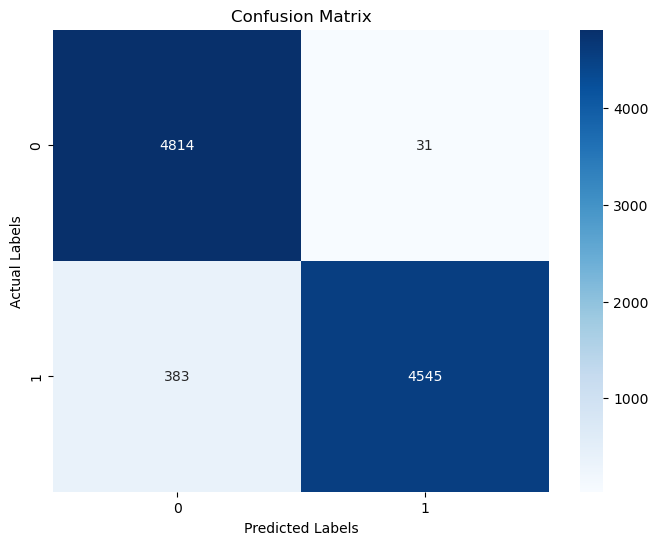

In [57]:
# Menampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Membuat visualisasi dari confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

In [58]:
print("Classification Report:\n\n", classification_report(y_test, y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.93      0.99      0.96      4845
           1       0.99      0.92      0.96      4928

    accuracy                           0.96      9773
   macro avg       0.96      0.96      0.96      9773
weighted avg       0.96      0.96      0.96      9773



In [59]:
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc}")

AUC: 0.984113609558656


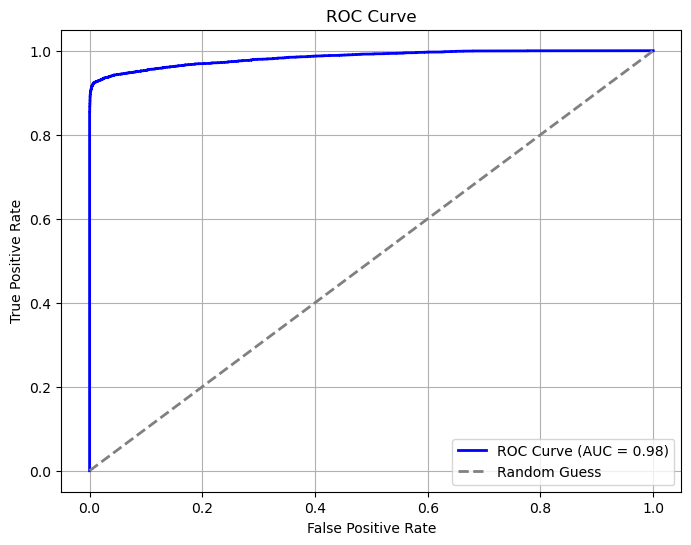

In [60]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=2, label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

---

## **Hyperparameter Tuning XGBoost Classifier Model**

In [61]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2], 
    'max_depth': [3, 5, 7], 
    'n_estimators': [50, 100, 150, 200, 300, 500],
    'subsample': [0.8, 1.0], 
    'colsample_bytree': [0.8, 1.0],
}

In [62]:
from sklearn.model_selection import GridSearchCV

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150, 200, 300, 500],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [63]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.8}
Best score: 0.9558442935487733


## **Evaluate The XGBoost Classifier Model (After Tuning)**

In [64]:
# Evaluasi model terbaik dengan data uji
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

In [65]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.2f}")

Akurasi: 0.96


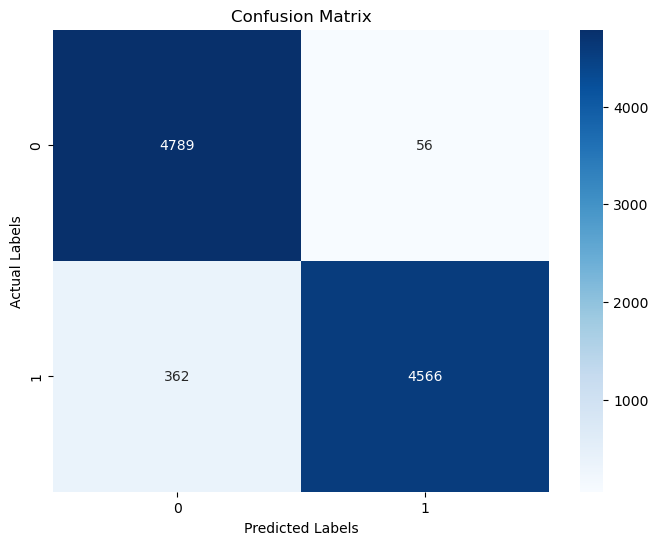

In [66]:
# Menampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Membuat visualisasi dari confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

In [67]:
print("Classification Report:\n\n", classification_report(y_test, y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.93      0.99      0.96      4845
           1       0.99      0.93      0.96      4928

    accuracy                           0.96      9773
   macro avg       0.96      0.96      0.96      9773
weighted avg       0.96      0.96      0.96      9773



In [68]:
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc}")

AUC: 0.9854031804109202


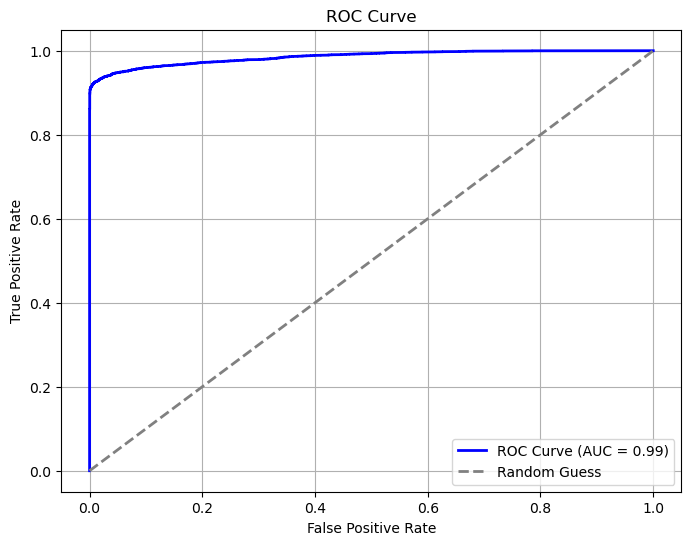

In [69]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=2, label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

---

## **Export XGBoost Model**

In [70]:
import pickle

with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

&nbsp;
&nbsp;

---

&nbsp;
&nbsp;

# **K-Means Model (Clustering)**

&nbsp;
&nbsp;

---

&nbsp;
&nbsp;

## **Pre-Modelling**

### Feature Selection for Clustering

In [31]:
data_clustering = data_outlier[['person_age', 'loan_amnt', 'loan_percent_income', 'cb_person_cred_hist_length']]

### Data Scaler

In [34]:
scaler = StandardScaler()
data_clustering_scaled = scaler.fit_transform(data_clustering)
data_clustering_scaled = pd.DataFrame(data_clustering_scaled, columns=data_clustering.columns)

In [35]:
data_clustering_scaled

,person_age,loan_amnt,loan_percent_income,cb_person_cred_hist_length
0,-0.990782,4.033317,3.927966,-0.721149
1,-1.184248,-1.360932,-0.660138,-1.027198
2,-0.410384,-0.646988,3.740696,-0.721149
3,-0.797316,4.033317,3.366157,-1.027198
4,-0.603850,4.033317,3.553427,-0.415099
...,...,...,...,...
31268,1.911206,-0.884969,-1.221947,2.951446
31269,2.104672,-1.043624,-1.502851,2.033297
31270,2.104672,1.018884,-0.191964,2.339347
31271,1.717741,-0.884969,-1.221947,2.339347


### Data Reduction Using PCA With 2 Component

In [108]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) 
df_pca = pca.fit_transform(data_clustering_scaled)  

pca_df = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
pca_df.head()

,PCA1,PCA2
0,-0.964889,5.675457
1,-1.650098,-1.360223
2,-0.894963,2.228994
3,-1.036650,5.280157
4,-0.471215,5.389286


### Determining the Optimal K (Elbow Method)

In [109]:
from sklearn.cluster import KMeans

# Metode Elbow untuk menentukan jumlah cluster optimal
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

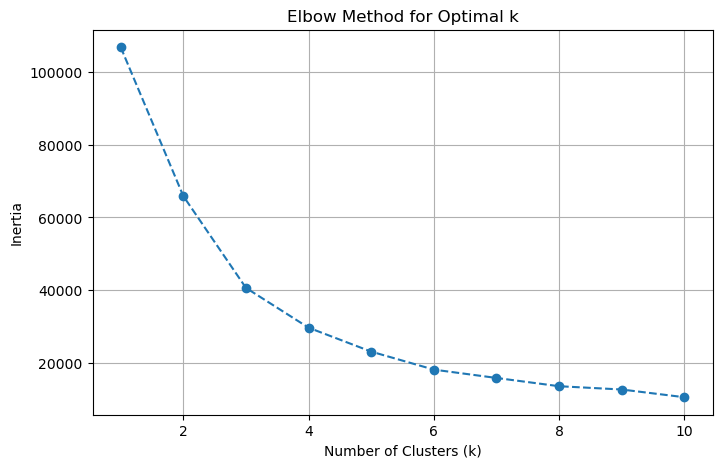

In [110]:
# Plot Elbow
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


---

## **Build K-Means Model (Before Tuning)**

In [112]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(pca_df)

KMeans(n_clusters=4, random_state=42)

In [113]:
pca_df['Cluster'] = kmeans.labels_

pca_df

,PCA1,PCA2,Cluster
0,-0.964889,5.675457,2
1,-1.650098,-1.360223,0
2,-0.894963,2.228994,2
3,-1.036650,5.280157,2
4,-0.471215,5.389286,2
...,...,...,...
31268,3.380253,-1.633102,1
31269,2.861698,-1.923389,1
31270,3.210662,0.449299,1
31271,2.812321,-1.609505,1


## **Evaluate The K-Means Model (Before Tuning)**

In [114]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(pca_df, kmeans.labels_)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.6156731193971459


---

## **Hyperparameter Tuning K-Means Model**

In [115]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_clusters': [2, 3, 4, 5, 6], 
    'init': ['k-means++', 'random'], 
    'n_init': [10, 20],
    'max_iter': [100, 300, 500, 1000] 
}

kmeans = KMeans(random_state=42)
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid)

In [116]:
grid_search.fit(pca_df)

GridSearchCV(estimator=KMeans(random_state=42),
             param_grid={'init': ['k-means++', 'random'],
                         'max_iter': [100, 300, 500, 1000],
                         'n_clusters': [2, 3, 4, 5, 6], 'n_init': [10, 20]})

## **Evaluate The K-Means Model (After Tuning)**

In [117]:
best_score = -1
best_params = None

In [119]:
for params in grid_search.cv_results_['params']:
    model = KMeans(**params)
    cluster_labels = model.fit_predict(pca_df)
    score = silhouette_score((pca_df), cluster_labels)

    if score > best_score:
        best_score = score
        best_params = params

In [120]:
print("Best Parameters: ", best_params)
print("Best Silhouette Score: ", best_score)

Best Parameters:  {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 4, 'n_init': 10}
Best Silhouette Score:  0.6156731193971459


---

## **Best K-Means Model**

In [122]:
best_model = KMeans(**best_params)

best_model.fit(pca_df)

KMeans(max_iter=100, n_clusters=4, n_init=10)

In [124]:
pca_df['Cluster'] = best_model.labels_
centroids = best_model.cluster_centers_

pca_df

,PCA1,PCA2,Cluster
0,-0.964889,5.675457,1
1,-1.650098,-1.360223,0
2,-0.894963,2.228994,1
3,-1.036650,5.280157,1
4,-0.471215,5.389286,1
...,...,...,...
31268,3.380253,-1.633102,3
31269,2.861698,-1.923389,3
31270,3.210662,0.449299,3
31271,2.812321,-1.609505,3


### Visualizing Clustering Results and Centroids

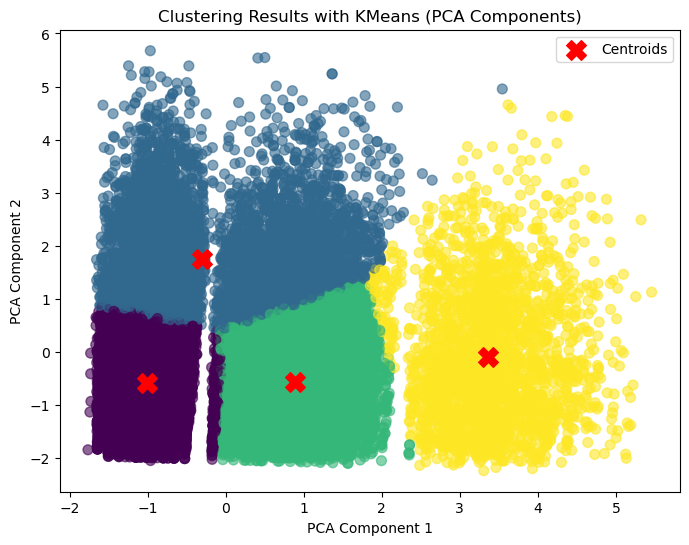

In [125]:
# Plot hasil clustering
plt.figure(figsize=(8, 6))

# Scatter plot data berdasarkan label cluster
plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=pca_df['Cluster'], cmap='viridis', s=50, alpha=0.6)

# Menambahkan centroid pada plot
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label dan judul
plt.title('Clustering Results with KMeans (PCA Components)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()

# Tampilkan plot
plt.show()

---

## **Export K-Means Best Model**

In [123]:
import pickle

with open('k_means_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)